# Prediccion de ingresos (Negocio de helados)

En este notebook se creara un modelo capaz de predecir los ingresos diarios en dolares basados en la temperatura (Celsius). El data set utilizado fue publicado en Kaggle https://www.kaggle.com/datasets/vinicius150987/ice-cream-revenue

### Librerias utilizadas

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Cargamos el dataset (.csv)

In [2]:
data_df = pd.read_csv('/content/IceCreamData.csv')
data_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


### Visualizacion de datos

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


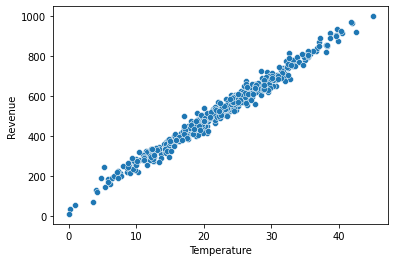

In [3]:
sns.scatterplot(data_df['Temperature'], data_df['Revenue'])

Como se puede observar en el grafico existe mas variacion en los datos de entrada y salida.

### Creando set de entrenamiento 

In [4]:
X_train = data_df['Temperature']
y_train = data_df['Revenue']

### Creando modelo 

In [121]:
model = tf.keras.Sequential()
model.add(
    tf.keras.layers.Dense(
        units=1,
        input_shape = [1]
    )
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Compilacion de modelo

In [122]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.1),
    loss='mse'
)

### Entrenando Modelo

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=1000)

### Observacion de Keys

In [22]:
keys = epochs_hist.history.keys()
print(epochs_hist.history['loss'])

[329139.71875, 285852.28125, 247574.828125, 212575.890625, 181466.453125, 154080.09375, 130130.3984375, 109109.6640625, 90996.203125, 75272.2421875, 61970.12890625, 50693.8828125, 41086.8203125, 33207.69921875, 26645.5234375, 21193.8671875, 16783.36328125, 13196.90234375, 10366.7275390625, 8089.193359375, 6352.6005859375, 4932.35986328125, 3864.1767578125, 3027.239990234375, 2411.670166015625, 1939.396728515625, 1586.823486328125, 1327.6121826171875, 1139.5345458984375, 1003.5911865234375, 902.1238403320312, 832.2344360351562, 782.5676879882812, 748.208740234375, 721.9157104492188, 706.4638061523438, 694.2240600585938, 686.5789794921875, 681.6727294921875, 677.7673950195312, 675.3480224609375, 674.076904296875, 672.84375, 672.1932983398438, 671.76611328125, 671.36474609375, 671.0147705078125, 670.9717407226562, 670.7750854492188, 670.7892456054688, 670.555419921875, 670.3849487304688, 670.333984375, 670.1972045898438, 670.115966796875, 670.135986328125, 669.9492797851562, 669.726135253

### Grafico de entrenamiento del modelo

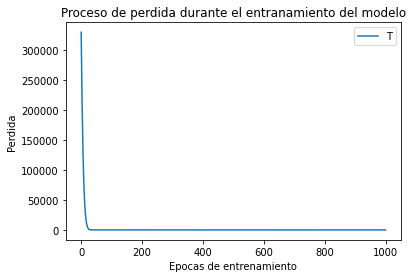

In [13]:
epochs_hist.history.keys()
plt.plot(epochs_hist.history['loss'])
plt.title('Proceso de perdida durante el entranamiento del modelo')
plt.xlabel('Epocas de entrenamiento')
plt.ylabel('Perdida')
plt.legend('Training Loss')

### Obtencion de pesos del modelo

In [14]:
weights = model.get_weights()
print(weights)

[array([[21.430172]], dtype=float32), array([44.818012], dtype=float32)]


### Realizando prediccion 

In [124]:
Temperatura_prediccion = 18
revenue_alt = model.predict([Temperatura_prediccion])

print(f'La ganancia cuando la temperatura este a {Temperatura_prediccion} sera de : {revenue_alt}')

1/1 [==============================] - 0s 53ms/step
La ganancia cuando la temperatura este a 18 sera de : [[431.7677]]


### Obtencion del MSE
MSE o Mean Squared Error de predicción tiene como objetivo encontrar el error cuadrático promedio entre los valores reales y los valores predichos

In [168]:
prediction = model.predict(X_train)
predict = []
true = y_train.tolist()
for i in prediction:
  predict.append(i[0])

MSE_scaled = tf.keras.metrics.mean_squared_error(y_train, predict)
MSE_scaled

16/16 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=624.5495>

### Grafico de prediccion

16/16 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'Predicccion de ganancias segun la temperatura.')

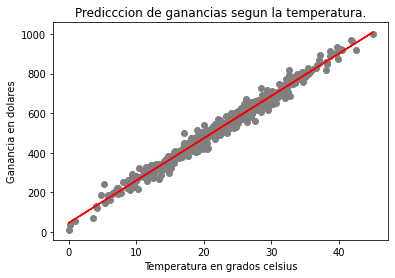

In [17]:
plt.scatter(X_train, y_train, color='gray')
plt.plot(X_train, model.predict(X_train), color='red')
plt.ylabel('Ganancia en dolares')
plt.xlabel('Temperatura en grados celsius')
plt.title('Predicccion de ganancias segun la temperatura.')

In [143]:
# Convert Multi-dimensional NumPy Array to List
arr = np.array([[3,6,9], [2,5,8]])
print(f'NumPy Array:\n{arr}')

# Use tolist() Method
list = arr.tolist()
print(f'List: {list}')

NumPy Array:
[[3 6 9]
 [2 5 8]]
List: [[3, 6, 9], [2, 5, 8]]
